In [1]:
import numpy as np

Copies owns the data, and views does not own the data, but how can we check this?

Every NumPy array has the attribute base that returns None if the array owns the data.

Otherwise, the base  attribute refers to the original object.

In [2]:
arr = np.array([1, 2, 3, 4, 5])

x = arr.copy()
y = arr.view()

print(x.base)
print(y.base)

None
[1 2 3 4 5]


Check if the returned array is a copy or a view:
The example below returns the original array, so it is a view.

In [3]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

print(arr.reshape(2, 4).base)

[1 2 3 4 5 6 7 8]


You are allowed to have one "unknown" dimension.

Meaning that you do not have to specify an exact number for one of the dimensions in the reshape method.

Pass -1 as the value, and NumPy will calculate this number for you.

In [4]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

newarr = arr.reshape(2, 2, -1)

print(newarr)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


Flattening array means converting a multidimensional array into a 1D array.

We can use reshape(-1) to do this.

In [5]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

newarr = arr.reshape(-1)

print(newarr)

[1 2 3 4 5 6]


The function nditer() is a helping function that can be used from very basic to very advanced iterations. It solves some basic issues which we face in iteration, lets go through it with examples.

Iterating on Each Scalar Element

In basic for loops, iterating through each scalar of an array we need to use n for loops which can be difficult to write for arrays with very high dimensionality.

In [6]:
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

for x in np.nditer(arr):
  print(x)

1
2
3
4
5
6
7
8


We can use op_dtypes argument and pass it the expected datatype to change the datatype of elements while iterating.

NumPy does not change the data type of the element in-place (where the element is in array) so it needs some other space to perform this action, that extra space is called buffer, and in order to enable it in nditer() we pass flags=['buffered'].

In [7]:
arr = np.array([1, 2, 3])

for x in np.nditer(arr, flags=['buffered'], op_dtypes=['S']):
  print(x)

b'1'
b'2'
b'3'


We can use filtering and followed by iteration.

Iterate through every scalar element of the 2D array skipping 1 element:

In [8]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

for x in np.nditer(arr[:, ::2]):
  print(x)

1
3
5
7


Enumeration means mentioning sequence number of somethings one by one.

Sometimes we require corresponding index of the element while iterating, the ndenumerate() method can be used for those usecases.


Enumerate on following 1D arrays elements:

In [9]:
arr = np.array([1, 2, 3])

for idx, x in np.ndenumerate(arr):
  print(idx, x)

(0,) 1
(1,) 2
(2,) 3


Enumerate on following 2D array's elements:

In [10]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

for idx, x in np.ndenumerate(arr):
  print(idx, x)

(0, 0) 1
(0, 1) 2
(0, 2) 3
(0, 3) 4
(1, 0) 5
(1, 1) 6
(1, 2) 7
(1, 3) 8


Joining means putting contents of two or more arrays in a single array.

In SQL we join tables based on a key, whereas in NumPy we join arrays by axes.

We pass a sequence of arrays that we want to join to the concatenate() function, along with the axis. If axis is not explicitly passed, it is taken as 0.

In [11]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))

print(arr)

[1 2 3 4 5 6]


In [12]:
# arr1 = np.concatenate((arr1, arr2),axis=1)

# print(arr1)

Join two 2-D arrays along rows (axis=1):

In [13]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

arr = np.concatenate((arr1, arr2), axis=1)

print(arr)

[[1 2 5 6]
 [3 4 7 8]]


In [14]:
arr_0 = np.concatenate((arr1, arr2), axis=0)

print(arr_0)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


Stacking is same as concatenation, the only difference is that stacking is done along a new axis.

We can concatenate two 1-D arrays along the second axis which would result in putting them one over the other, ie. stacking.

We pass a sequence of arrays that we want to join to the stack() method along with the axis. If axis is not explicitly passed it is taken as 0.

In [15]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

arr = np.stack((arr1, arr2), axis=1)

print(arr)

[[1 4]
 [2 5]
 [3 6]]


In [16]:
arr0 = np.stack((arr1, arr2), axis=0)

print(arr0)

[[1 2 3]
 [4 5 6]]


NumPy provides a helper function: hstack() to stack along rows.

In [17]:
arr = np.hstack((arr1, arr2))

print(arr)

[1 2 3 4 5 6]


NumPy provides a helper function: vstack()  to stack along columns.

In [18]:
arr = np.vstack((arr1, arr2))

print(arr)

[[1 2 3]
 [4 5 6]]


NumPy provides a helper function: dstack() to stack along height, which is the same as depth.

In [19]:
arr = np.dstack((arr1, arr2))

print(arr)

[[[1 4]
  [2 5]
  [3 6]]]


Splitting is reverse operation of Joining.

Joining merges multiple arrays into one and Splitting breaks one array into multiple.

We use array_split() for splitting arrays, we pass it the array we want to split and the number of splits.

In [20]:
arr = np.array([1, 2, 3, 4, 5, 6])

newarr = np.array_split(arr, 3)

print(newarr)

arr = newarr[1]
print(arr)
type(arr)

[array([1, 2]), array([3, 4]), array([5, 6])]
[3 4]


numpy.ndarray

In [21]:
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])

newarr = np.array_split(arr, 3)

for el in newarr:
  print(el)
  print()

[[1 2]
 [3 4]]

[[5 6]
 [7 8]]

[[ 9 10]
 [11 12]]



In addition, you can specify which axis you want to do the split around.

The example below also returns three 2-D arrays, but they are split along the row (axis=1).

Split the 2-D array into three 2-D arrays along rows.

In [22]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])

newarr = np.array_split(arr, 3, axis=1)

print(newarr)

for el in newarr:
  print(el)
  print()

[array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13],
       [16]]), array([[ 2],
       [ 5],
       [ 8],
       [11],
       [14],
       [17]]), array([[ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18]])]
[[ 1]
 [ 4]
 [ 7]
 [10]
 [13]
 [16]]

[[ 2]
 [ 5]
 [ 8]
 [11]
 [14]
 [17]]

[[ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]]



Use the hsplit() method to split the 2-D array into three 2-D arrays along rows.



In [23]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])

newarr = np.hsplit(arr, 3)

print(newarr)

for el in newarr:
  print(el)
  print()

[array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13],
       [16]]), array([[ 2],
       [ 5],
       [ 8],
       [11],
       [14],
       [17]]), array([[ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18]])]
[[ 1]
 [ 4]
 [ 7]
 [10]
 [13]
 [16]]

[[ 2]
 [ 5]
 [ 8]
 [11]
 [14]
 [17]]

[[ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]]



You can search an array for a certain value, and return the indexes that get a match.

To search an array, use the where() method.



In [24]:
arr = np.array([1, 2, 3, 4, 5, 4, 4])

x = np.where(arr == 4)

print(x)

print(arr[x])

(array([3, 5, 6]),)
[4 4 4]


Find the indexes where the values are even:

In [25]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

x = np.where(arr%2 == 0)

print(x)

(array([1, 3, 5, 7]),)


Getting some elements out of an existing array and creating a new array out of them is called filtering.

In NumPy, you filter an array using a boolean index list.

In [26]:
arr = np.array([41, 42, 43, 44])

x = [True, False, True, False]

newarr = arr[x]

print(newarr)

[41 43]


Create a filter array that will return only values higher than 42:

In [27]:
arr = np.array([41, 42, 43, 44])

# Create an empty list
filter_arr = []

# go through each element in arr
for element in arr:
  # if the element is higher than 42, set the value to True, otherwise False:
  if element > 42:
    filter_arr.append(True)
  else:
    filter_arr.append(False)

newarr = arr[filter_arr]

print(filter_arr)
print(newarr)

[False, False, True, True]
[43 44]


The above example is quite a common task in NumPy and NumPy provides a nice way to tackle it.

We can directly substitute the array instead of the iterable variable in our condition and it will work just as we expect it to.

In [28]:
arr = np.array([41, 42, 43, 44])

filter_arr = arr > 42

newarr = arr[filter_arr]

print(filter_arr)
print(newarr)

[False False  True  True]
[43 44]


Generate a 1-D array containing 5 random integers from 0 to 100:

In [29]:
from numpy import random

x=random.randint(100, size=(5))

print(x)

[11 65 94  7 88]


Generate a 2-D array with 3 rows, each row containing 5 random numbers:

In [30]:
x = random.rand(3, 5)

print(x)

[[0.67375141 0.24115716 0.18378943 0.85716033 0.27475999]
 [0.29806618 0.43527927 0.85185073 0.43022062 0.07555865]
 [0.85228911 0.2760524  0.33297325 0.95712582 0.33258439]]


Generate a 1-D array containing 100 values, where each value has to be 3, 5, 7 or 9.

In [31]:
x = random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(100))

print(x)

[7 7 7 7 7 5 7 5 7 5 7 7 5 5 5 5 7 3 7 5 7 7 7 7 7 7 7 7 7 7 7 5 5 7 7 7 7
 5 3 5 7 7 5 5 7 3 5 7 7 7 7 7 7 7 5 7 7 7 7 5 7 5 7 5 7 7 7 7 3 5 5 7 7 7
 5 7 5 5 7 7 7 7 7 7 5 5 7 7 5 7 7 5 7 5 5 5 7 5 3 3]


Randomly shuffle elements of following array:

The shuffle() method makes changes to the original array.

In [32]:
arr = np.array([1, 2, 3, 4, 5])

random.shuffle(arr)

print(arr)

[2 1 4 5 3]


Generate a random permutation of elements of following array:

The permutation() method returns a re-arranged array (and leaves the original array un-changed).

In [33]:
arr = np.array([1, 2, 3, 4, 5])

print(random.permutation(arr))

[1 2 3 4 5]


Use the random.normal() method to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.



In [34]:
x = random.normal(loc=1, scale=2, size=(2, 3))

print(x)

[[-1.74088005  2.20708299  1.26461321]
 [ 1.5794217  -2.02546762 -1.17927439]]


<ipython-input-35-61e5569fff46>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(size=1000), hist=False)


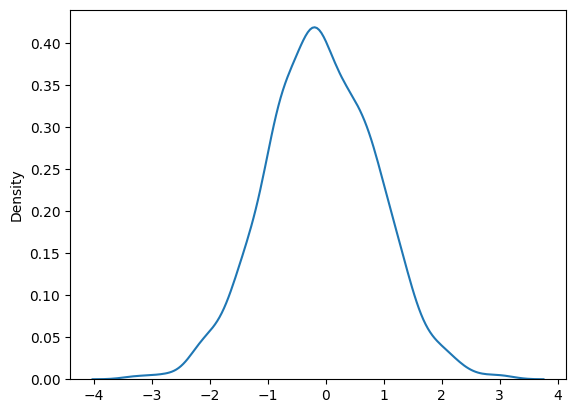

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(size=1000), hist=False)

plt.show()

With ufunc, we can use the add() function:

In [36]:
x = [1, 2, 3, 4]
y = [4, 5, 6, 7]
z = np.add(x, y)

print(z)

[ 5  7  9 11]


Sum the values in arr1 and the values in arr2:

In [37]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([1, 2, 3])

newarr = np.sum([arr1, arr2])

print(newarr)


12


Perform summation in the following array over 1st axis:

In [38]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([1, 2, 3])

newarr = np.sum([arr1, arr2], axis=1)

print(newarr)


[6 6]


To create your own ufunc, you have to define a function, like you do with normal functions in Python, then you add it to your NumPy ufunc library with the frompyfunc() method.

The frompyfunc() method takes the following arguments:

function - the name of the function.
inputs - the number of input arguments (arrays).
outputs - the number of output arrays.


In [39]:
def myadd(x, y):
  return x+y

myadd = np.frompyfunc(myadd, 2, 1)

print(myadd([1, 2, 3, 4], [5, 6, 7, 8]))

[6 8 10 12]


# **Understanding Axes**

he example above shows how important it is to know not only what shape your data is in but also which data is in which axis. In NumPy arrays, axes are zero-indexed and identify which dimension is which. For example, a two-dimensional array has a vertical axis (axis 0) and a horizontal axis (axis 1). Lots of functions and commands in NumPy change their behavior based on which axis you tell them to process.

This example will show how .max() behaves by default, with no axis argument, and how it changes functionality depending on which axis you specify when you do supply an argument:



In [40]:
table = np.array([
 [5, 3, 7, 1],
 [2, 6, 7 ,9],
 [1, 1, 1, 1] ])

print(table.max())
print("axis0:")
print(table.max(axis=0))
print("axis1:")
print(table.max(axis=1))

9
axis0:
[5 6 7 9]
axis1:
[7 9 1]


In [50]:
print(table)
print()

print(table.sum())
print("axis0:")
print(table.sum(axis=0))
print()
print("axis1:")
print(table.sum(axis=1))

[[5 3 7 1]
 [2 6 7 9]
 [1 1 1 1]]

44
axis0:
[ 8 10 15 11]

axis1:
[16 24  4]


In [48]:
print(table)
print()
print("axis0:")
print(table.mean(axis=0))
print()
print("axis1:")
print(table.mean(axis=1))

[[5 3 7 1]
 [2 6 7 9]
 [1 1 1 1]]

axis0:
[2.66666667 3.33333333 5.         3.66666667]

axis1:
[4. 6. 1.]
